In [3]:
# General imports 
import os 
import re
import numpy as np
import pandas as pd
from pathlib import Path
import scipy.stats as stats 
from skimage import measure
import matplotlib.pyplot as plt

# Pynwb imports
from hdmf_zarr import NWBZarrIO
from nwbwidgets import nwb2widget

In [4]:
# set data path
import sys
import platform
from os.path import join as pjoin

platstring = platform.platform()
system = platform.system()
if system == "Darwin":
    # macOS
    data_dir = "/Volumes/Brain2025/"
elif system == "Windows":
    # Windows (replace with the drive letter of USB drive)
    data_dir = "E:/"
elif "amzn" in platstring:
    # then on CodeOcean
    data_dir = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_dir = "/media/$USERNAME/Brain2025/"
    
print('data directory set to', data_dir)

data directory set to /data/


In [5]:
sys.path.insert(0,'/code/src')
from bci.loaders import load 

In [7]:
metadata = pd.read_csv(os.path.join(data_dir, 'bci_task_metadata', 'bci_metadata.csv'))
metadata.head()

,project_name,session_type,_id,name,subject_id,genotype,virus,date_of_birth,sex,modality,session_date,age,session_time,targeted_structure,ophys_fov,session_number
0,Brain Computer Interface,BCI single neuron stim,03f1b82e-4494-46bc-a959-50c4b14d13da,single-plane-ophys_731015_2025-01-28_17-40-57_...,731015,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,2024-03-14,Female,Planar optical physiology,2025-01-28,320,17:40:57.996000,Primary Motor Cortex,FOV_04,22.0
1,Brain Computer Interface,BCI single neuron stim,b28d6321-1b1b-4110-87fb-0e19325c1dfe,single-plane-ophys_767715_2025-02-17_17-41-50_...,767715,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,2024-09-15,Female,Planar optical physiology,2025-02-17,155,17:41:50.758000,Primary Motor Cortex,FOV_03,8.0
2,Brain Computer Interface,BCI single neuron stim,580448b2-4b93-4477-b6ac-6e2972792fe0,single-plane-ophys_772414_2025-01-27_15-57-05_...,772414,Camk2a-tTA/wt;tetO-GCaMP6s/wt,pAAV-CaMKIIa-ChRmine-oScarlet-Kv2.1-WPRE - 7413,2024-10-15,Female,Planar optical physiology,2025-01-27,104,14:23:26.693000,Primary Motor Cortex,FOV_01,5.0
3,Brain Computer Interface,BCI single neuron stim,c1be8449-7bef-4967-88f5-6a6ffc29e5a3,single-plane-ophys_772414_2025-02-06_16-47-44_...,772414,Camk2a-tTA/wt;tetO-GCaMP6s/wt,pAAV-CaMKIIa-ChRmine-oScarlet-Kv2.1-WPRE - 7413,2024-10-15,Female,Planar optical physiology,2025-02-06,114,16:47:44.152999,Primary Motor Cortex,FOV_02,13.0
4,Brain Computer Interface,BCI single neuron stim,15b395c0-1caf-4be4-a212-a13b9a4d1dfc,single-plane-ophys_772414_2025-02-10_11-15-26_...,772414,Camk2a-tTA/wt;tetO-GCaMP6s/wt,pAAV-CaMKIIa-ChRmine-oScarlet-Kv2.1-WPRE - 7413,2024-10-15,Female,Planar optical physiology,2025-02-10,118,11:15:26.609999,Primary Motor Cortex,FOV_03,14.0


In [8]:
metadata.columns

Index(['project_name', 'session_type', '_id', 'name', 'subject_id', 'genotype',
       'virus', 'date_of_birth', 'sex', 'modality', 'session_date', 'age',
       'session_time', 'targeted_structure', 'ophys_fov', 'session_number'],
      dtype='object')

In [10]:
metadata.session_time.unique()

array(['17:40:57.996000', '17:41:50.758000', '14:23:26.693000',
       '16:47:44.152999', '11:15:26.609999', '20:37:19.623000',
       '16:01:04.455000', '16:02:50.863999', '20:08:49.286000',
       '18:44:54.865000', '19:18:31.580999', '17:33:11.691000',
       '19:26:59.000999', '16:59:35.618000', '18:46:54.109999',
       '18:36:30.521000', '16:07:41.655000', '15:13:50.595999',
       '15:24:22.163000', '15:36:39.563000', '16:53:55.722000',
       '17:02:50.868000', '18:15:21.158999', '17:30:05.458999',
       '13:21:29.644999', '16:46:51.981999', '18:53:03.001999',
       '18:41:22.550000', '18:59:24.815999', '16:04:20.109000',
       '16:44:36.189000'], dtype=object)

In [11]:
import pandas as pd

# Convertir a datetime y extraer solo hora:minuto
metadata['session_time'] = pd.to_datetime(metadata['session_time']).dt.strftime('%H:%M')

# Verificar
print(metadata['session_time'].unique())

['17:40' '17:41' '14:23' '16:47' '11:15' '20:37' '16:01' '16:02' '20:08'
 '18:44' '19:18' '17:33' '19:26' '16:59' '18:46' '18:36' '16:07' '15:13'
 '15:24' '15:36' '16:53' '17:02' '18:15' '17:30' '13:21' '16:46' '18:53'
 '18:41' '18:59' '16:04' '16:44']


/tmp/ipykernel_196/376442925.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  metadata['session_time'] = pd.to_datetime(metadata['session_time']).dt.strftime('%H:%M')


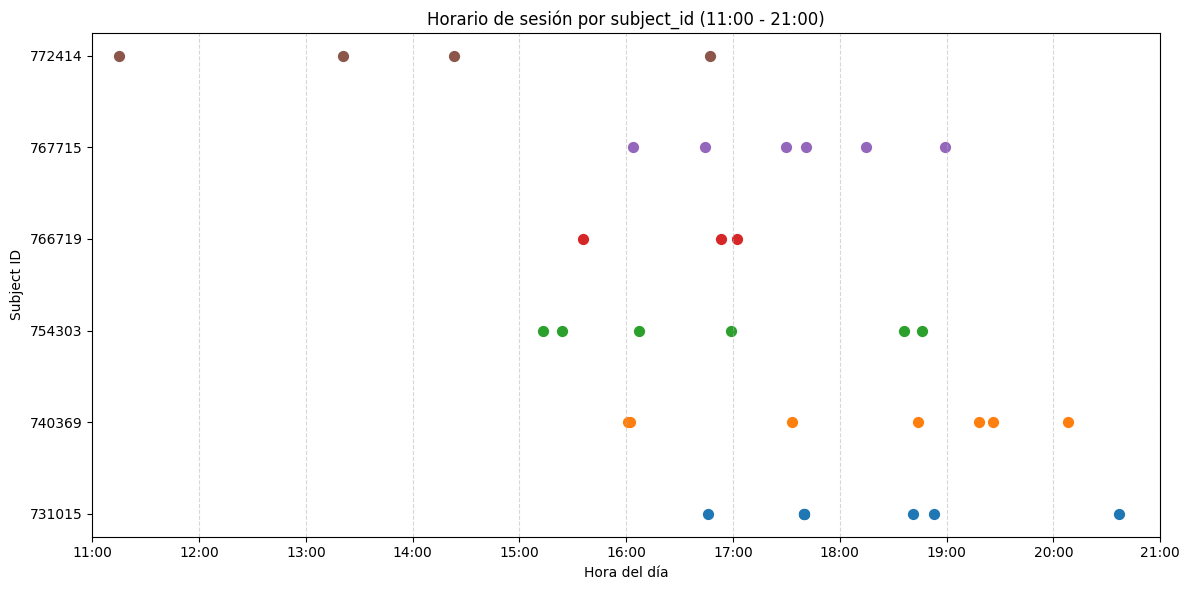

In [16]:
# Convertimos session_time a minutos desde medianoche
metadata['time_minutes'] = metadata['session_time'].str.split(':').apply(lambda x: int(x[0])*60 + int(x[1]))

# Ordenamos por subject_id y session_date
metadata_sorted = metadata.sort_values(['subject_id', 'session_date'])

# Crear un mapping de subject_id a posición uniforme
unique_subjects = sorted(metadata_sorted['subject_id'].unique())
subject_to_idx = {subj: idx for idx, subj in enumerate(unique_subjects)}

# Asignar índice a cada fila
metadata_sorted['subject_idx'] = metadata_sorted['subject_id'].map(subject_to_idx)

# Crear el plot
plt.figure(figsize=(12, 6))

for subj, group in metadata_sorted.groupby('subject_idx'):
    plt.scatter(group['time_minutes'], [subj]*len(group), s=50)

plt.yticks(range(len(unique_subjects)), unique_subjects)  # Etiquetas con los subject_id
plt.xlim(11*60, 21*60)  # Limitar entre 11:00 (660) y 21:00 (1260)
plt.xticks(range(11*60, 21*60+1, 60), [f"{h:02d}:00" for h in range(11, 22)])
plt.xlabel('Hora del día')
plt.ylabel('Subject ID')
plt.title('Horario de sesión por subject_id (11:00 - 21:00)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()